In [26]:
import bayesflare as bf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
client = bf.Loader('./TESS_data')

In [3]:
client.find(374859347, quarters="1")

['./TESS_data/Q1_public/tess2018206045859-s0001-0000000374859347-0120-s_lc.fits',
 './TESS_data/Q1_public/tess2018234235059-s0002-0000000374859347-0121-s_lc.fits',
 './TESS_data/Q1_public/tess2018263035959-s0003-0000000374859347-0123-s_lc.fits']

In [4]:
client.find(8451868)

['./TESS_data/Q1_public/tess_TESTkplr008451868-2009166043257_llc.fits']

In [5]:
crv = client.find(8451868, quarters="1")

In [6]:
lc = bf.Lightcurve(crv[0])

In [7]:
!ls ./TESS_Data/Q1_public/tess*8451868*lc.fits

./TESS_Data/Q1_public/tess_TESTkplr008451868-2009166043257_llc.fits


In [8]:
M = bf.Flare(lc.cts)

In [9]:
M.paramnames

['t0', 'tauexp', 'taugauss', 'amp']

In [10]:
M.shape

[]

In [11]:
paramranges = { 't0': (np.inf,),
               'tauexp': (0., 10.*3600., 10),
               'taugauss': (0., 10.*3600., 10),
               'amp': (1.,)}

In [12]:
M = bf.Flare(lc.cts, paramranges)

In [13]:
print(paramranges['t0'])

(inf,)


In [14]:
M.prior(paramranges)

-20.289401254316548

In [15]:
B = bf.Bayes(lc, M) # create the Bayes class

In [16]:
M.paramnames

['t0', 'tauexp', 'taugauss', 'amp']

In [17]:
np.median(lc.cts)

12808598.231674265

In [18]:
B.bayes_factors()   

In [19]:
from bayesflare.stats.general import logtrapz


In [20]:
O = B.marginalise_full()


In [21]:
print(O)

In [25]:
O.lnBmargAmp

array([-0.42329818, -0.50310986, -0.54916586, ..., -1.35176828,
       -1.24835876, -1.11818283])

In [24]:
O.lightcurve.cts

array([11362622.1334395 , 11364387.68227121, 11366153.22246852, ...,
       14251038.00485493, 14252803.52382925, 14254569.05142353])

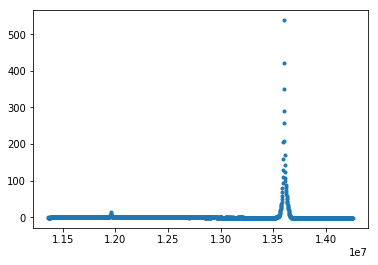

In [27]:
plt.scatter(O.lightcurve.cts,O.lnBmargAmp,marker=".")

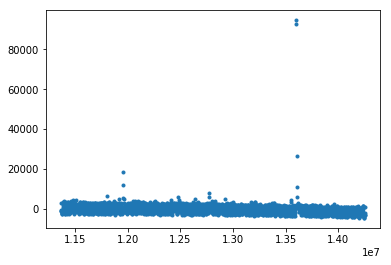

In [28]:
plt.scatter(lc.cts,lc.clc,marker = ".")